### 가우시안 노이즈

Best PSNR Parameters: Kernel Size = 3
Best SSIM Parameters: Kernel Size = 3
PSNR for Noisy Image: 21.51
PSNR for Denoised Image: 31.29
SSIM for Noisy Image: 0.68
SSIM for Denoised Image: 0.94


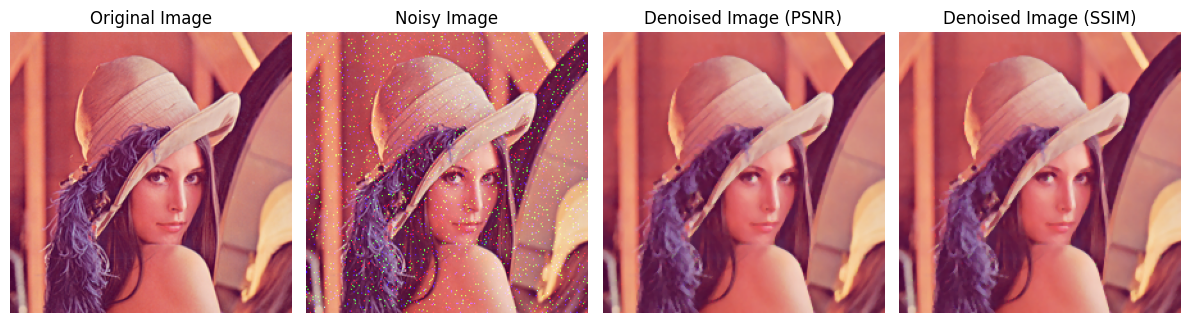

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# 원본 이미지 로드 또는 생성
original_image = cv2.imread("./img/Lenna.png", cv2.IMREAD_COLOR)

# 가우시안 노이즈 생성 및 추가
noise_sigma = 0.5
noise = np.random.normal(0, noise_sigma, original_image.shape).astype(np.uint8)
noisy_image = cv2.add(original_image, noise)

# 그리드 서치를 위한 파라미터 조합
kernel_sizes = [1, 3, 5, 7, 9, 11, 13]

best_psnr = -np.inf
best_ssim = -np.inf
best_params = {}

# 그리드 서치 실행
for kernel_size in kernel_sizes:
    denoised_image = cv2.medianBlur(noisy_image, kernel_size)
            
    # PSNR 계산
    psnr_noisy = cv2.PSNR(original_image, noisy_image)
    psnr_denoised = cv2.PSNR(original_image, denoised_image)
            
    # SSIM 계산
    ssim_noisy = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                      cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY))
    ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                         cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY))
            
    if psnr_denoised > best_psnr:
        best_psnr = psnr_denoised
        best_params['psnr'] = (kernel_size,)
        best_denoised_image_psnr = denoised_image
            
    if ssim_denoised > best_ssim:
        best_ssim = ssim_denoised
        best_params['ssim'] = (kernel_size,)
        best_denoised_image_ssim = denoised_image

psnr_denoised = cv2.PSNR(original_image, best_denoised_image_psnr)
ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                         cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2GRAY))

print(f"Best PSNR Parameters: Kernel Size = {best_params['psnr'][0]}")
print(f"Best SSIM Parameters: Kernel Size = {best_params['ssim'][0]}")
print(f"PSNR for Noisy Image: {psnr_noisy:.2f}")
print(f"PSNR for Denoised Image: {psnr_denoised:.2f}")
print(f"SSIM for Noisy Image: {ssim_noisy:.2f}")
print(f"SSIM for Denoised Image: {ssim_denoised:.2f}")

# 이미지 출력
plt.figure(figsize=(12, 6))

# 원본 이미지
plt.subplot(141)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# 노이즈가 섞인 이미지
plt.subplot(142)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (PSNR)
plt.subplot(143)
plt.imshow(cv2.cvtColor(best_denoised_image_psnr, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (PSNR)")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (SSIM)
plt.subplot(144)
plt.imshow(cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (SSIM)")
plt.axis("off")

plt.tight_layout()
plt.show()


Best PSNR Parameters: Kernel Size = 3
Best SSIM Parameters: Kernel Size = 3
PSNR for Noisy Image: 20.29
PSNR for Denoised Image: 27.70
SSIM for Noisy Image: 0.58
SSIM for Denoised Image: 0.87


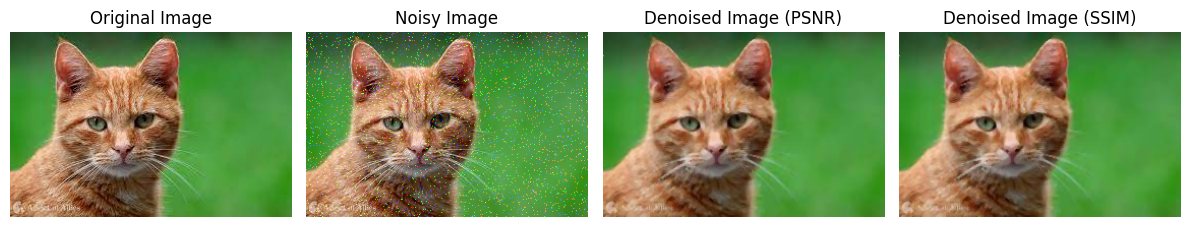

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# 원본 이미지 로드 또는 생성
original_image = cv2.imread("./img/cat.jpg", cv2.IMREAD_COLOR)

# 가우시안 노이즈 생성 및 추가
noise_sigma = 0.5
noise = np.random.normal(0, noise_sigma, original_image.shape).astype(np.uint8)
noisy_image = cv2.add(original_image, noise)

# 그리드 서치를 위한 파라미터 조합
kernel_sizes = [1, 3, 5, 7, 9, 11, 13]

best_psnr = -np.inf
best_ssim = -np.inf
best_params = {}

# 그리드 서치 실행
for kernel_size in kernel_sizes:
    denoised_image = cv2.medianBlur(noisy_image, kernel_size)
            
    # PSNR 계산
    psnr_noisy = cv2.PSNR(original_image, noisy_image)
    psnr_denoised = cv2.PSNR(original_image, denoised_image)
            
    # SSIM 계산
    ssim_noisy = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                      cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY))
    ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                         cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY))
            
    if psnr_denoised > best_psnr:
        best_psnr = psnr_denoised
        best_params['psnr'] = (kernel_size,)
        best_denoised_image_psnr = denoised_image
            
    if ssim_denoised > best_ssim:
        best_ssim = ssim_denoised
        best_params['ssim'] = (kernel_size,)
        best_denoised_image_ssim = denoised_image

psnr_denoised = cv2.PSNR(original_image, best_denoised_image_psnr)
ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                         cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2GRAY))

print(f"Best PSNR Parameters: Kernel Size = {best_params['psnr'][0]}")
print(f"Best SSIM Parameters: Kernel Size = {best_params['ssim'][0]}")
print(f"PSNR for Noisy Image: {psnr_noisy:.2f}")
print(f"PSNR for Denoised Image: {psnr_denoised:.2f}")
print(f"SSIM for Noisy Image: {ssim_noisy:.2f}")
print(f"SSIM for Denoised Image: {ssim_denoised:.2f}")

# 이미지 출력
plt.figure(figsize=(12, 6))

# 원본 이미지
plt.subplot(141)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# 노이즈가 섞인 이미지
plt.subplot(142)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (PSNR)
plt.subplot(143)
plt.imshow(cv2.cvtColor(best_denoised_image_psnr, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (PSNR)")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (SSIM)
plt.subplot(144)
plt.imshow(cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (SSIM)")
plt.axis("off")

plt.tight_layout()
plt.show()


Best PSNR Parameters: Kernel Size = 3
Best SSIM Parameters: Kernel Size = 3
PSNR for Noisy Image: 19.90
PSNR for Denoised Image: 32.26
SSIM for Noisy Image: 0.58
SSIM for Denoised Image: 0.92


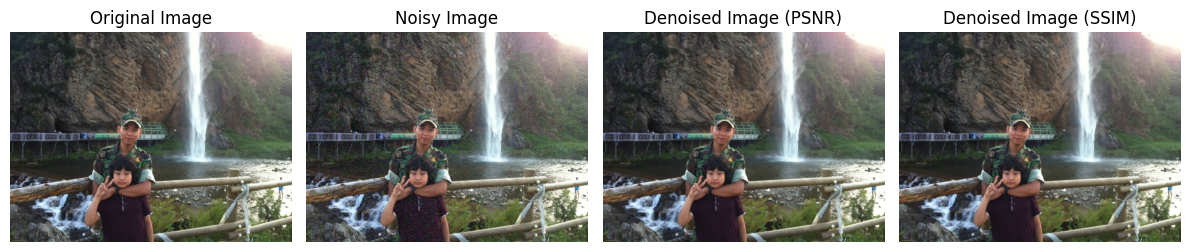

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# 원본 이미지 로드 또는 생성
original_image = cv2.imread("./img/image.jpg", cv2.IMREAD_COLOR)

# 가우시안 노이즈 생성 및 추가
noise_sigma = 0.5
noise = np.random.normal(0, noise_sigma, original_image.shape).astype(np.uint8)
noisy_image = cv2.add(original_image, noise)

# 그리드 서치를 위한 파라미터 조합
kernel_sizes = [1, 3, 5, 7, 9, 11, 13]

best_psnr = -np.inf
best_ssim = -np.inf
best_params = {}

# 그리드 서치 실행
for kernel_size in kernel_sizes:
    denoised_image = cv2.medianBlur(noisy_image, kernel_size)
            
    # PSNR 계산
    psnr_noisy = cv2.PSNR(original_image, noisy_image)
    psnr_denoised = cv2.PSNR(original_image, denoised_image)
            
    # SSIM 계산
    ssim_noisy = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                      cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY))
    ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                         cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY))
            
    if psnr_denoised > best_psnr:
        best_psnr = psnr_denoised
        best_params['psnr'] = (kernel_size,)
        best_denoised_image_psnr = denoised_image
            
    if ssim_denoised > best_ssim:
        best_ssim = ssim_denoised
        best_params['ssim'] = (kernel_size,)
        best_denoised_image_ssim = denoised_image

psnr_denoised = cv2.PSNR(original_image, best_denoised_image_psnr)
ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                         cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2GRAY))

print(f"Best PSNR Parameters: Kernel Size = {best_params['psnr'][0]}")
print(f"Best SSIM Parameters: Kernel Size = {best_params['ssim'][0]}")
print(f"PSNR for Noisy Image: {psnr_noisy:.2f}")
print(f"PSNR for Denoised Image: {psnr_denoised:.2f}")
print(f"SSIM for Noisy Image: {ssim_noisy:.2f}")
print(f"SSIM for Denoised Image: {ssim_denoised:.2f}")

# 이미지 출력
plt.figure(figsize=(12, 6))

# 원본 이미지
plt.subplot(141)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# 노이즈가 섞인 이미지
plt.subplot(142)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (PSNR)
plt.subplot(143)
plt.imshow(cv2.cvtColor(best_denoised_image_psnr, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (PSNR)")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (SSIM)
plt.subplot(144)
plt.imshow(cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (SSIM)")
plt.axis("off")

plt.tight_layout()
plt.show()


### 소금후추 노이즈

Best PSNR Parameters: Kernel Size = 3
Best SSIM Parameters: Kernel Size = 3
PSNR for Noisy Image: 17.37
PSNR for Denoised Image: 31.85
SSIM for Noisy Image: 0.33
SSIM for Denoised Image: 0.91


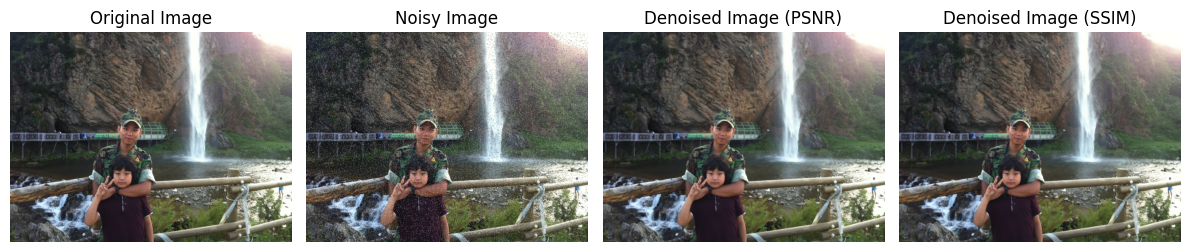

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# 원본 이미지 로드 또는 생성
original_image = cv2.imread("./img/image.jpg", cv2.IMREAD_COLOR)

# 소금-후추 노이즈 생성 및 추가
noise_amount = 0.02  # 노이즈가 추가될 픽셀 비율
salt_amount = int(noise_amount * original_image.size) // 2  # 흰색 (소금) 노이즈 개수
pepper_amount = int(noise_amount * original_image.size) // 2  # 검은색 (후추) 노이즈 개수

salt_coords = [np.random.randint(0, i - 1, salt_amount) for i in original_image.shape]
pepper_coords = [np.random.randint(0, i - 1, pepper_amount) for i in original_image.shape]

noisy_image = original_image.copy()

for i in range(salt_amount):
    noisy_image[salt_coords[0][i], salt_coords[1][i], :] = 255  # 흰색

for i in range(pepper_amount):
    noisy_image[pepper_coords[0][i], pepper_coords[1][i], :] = 0  # 검은색

# 그리드 서치를 위한 파라미터 조합
kernel_sizes = [1, 3, 5, 7, 9, 11, 13]

best_psnr = -np.inf
best_ssim = -np.inf
best_params = {}

# 그리드 서치 실행
for kernel_size in kernel_sizes:
    denoised_image = cv2.medianBlur(noisy_image, kernel_size)
            
    # PSNR 계산
    psnr_noisy = cv2.PSNR(original_image, noisy_image)
    psnr_denoised = cv2.PSNR(original_image, denoised_image)
            
    # SSIM 계산
    ssim_noisy = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                      cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY))
    ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                         cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY))
            
    if psnr_denoised > best_psnr:
        best_psnr = psnr_denoised
        best_params['psnr'] = (kernel_size,)
        best_denoised_image_psnr = denoised_image
            
    if ssim_denoised > best_ssim:
        best_ssim = ssim_denoised
        best_params['ssim'] = (kernel_size,)
        best_denoised_image_ssim = denoised_image

psnr_denoised = cv2.PSNR(original_image, best_denoised_image_psnr)
ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                         cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2GRAY))

print(f"Best PSNR Parameters: Kernel Size = {best_params['psnr'][0]}")
print(f"Best SSIM Parameters: Kernel Size = {best_params['ssim'][0]}")
print(f"PSNR for Noisy Image: {psnr_noisy:.2f}")
print(f"PSNR for Denoised Image: {psnr_denoised:.2f}")
print(f"SSIM for Noisy Image: {ssim_noisy:.2f}")
print(f"SSIM for Denoised Image: {ssim_denoised:.2f}")

# 이미지 출력
plt.figure(figsize=(12, 6))

# 원본 이미지
plt.subplot(141)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# 노이즈가 섞인 이미지
plt.subplot(142)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (PSNR)
plt.subplot(143)
plt.imshow(cv2.cvtColor(best_denoised_image_psnr, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (PSNR)")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (SSIM)
plt.subplot(144)
plt.imshow(cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (SSIM)")
plt.axis("off")

plt.tight_layout()
plt.show()

Best PSNR Parameters: Kernel Size = 3
Best SSIM Parameters: Kernel Size = 3
PSNR for Noisy Image: 17.50
PSNR for Denoised Image: 30.83
SSIM for Noisy Image: 0.39
SSIM for Denoised Image: 0.93


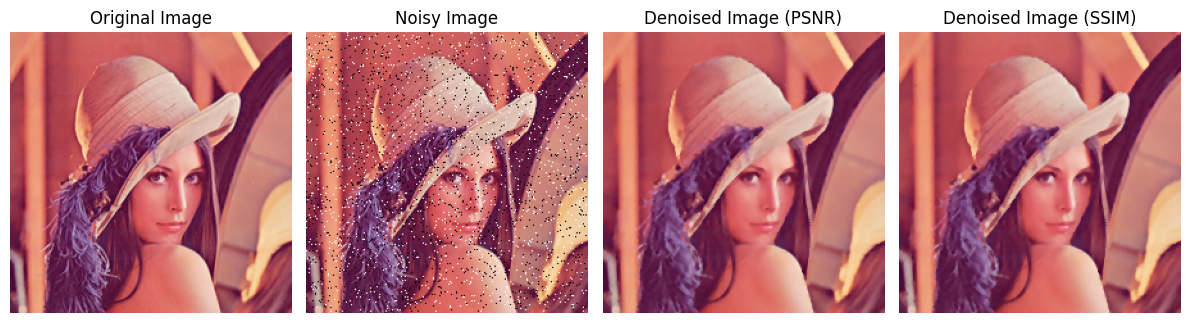

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# 원본 이미지 로드 또는 생성
original_image = cv2.imread("./img/Lenna.png", cv2.IMREAD_COLOR)

# 소금-후추 노이즈 생성 및 추가
noise_amount = 0.02  # 노이즈가 추가될 픽셀 비율
salt_amount = int(noise_amount * original_image.size) // 2  # 흰색 (소금) 노이즈 개수
pepper_amount = int(noise_amount * original_image.size) // 2  # 검은색 (후추) 노이즈 개수

salt_coords = [np.random.randint(0, i - 1, salt_amount) for i in original_image.shape]
pepper_coords = [np.random.randint(0, i - 1, pepper_amount) for i in original_image.shape]

noisy_image = original_image.copy()

for i in range(salt_amount):
    noisy_image[salt_coords[0][i], salt_coords[1][i], :] = 255  # 흰색

for i in range(pepper_amount):
    noisy_image[pepper_coords[0][i], pepper_coords[1][i], :] = 0  # 검은색

# 그리드 서치를 위한 파라미터 조합
kernel_sizes = [1, 3, 5, 7, 9, 11, 13]

best_psnr = -np.inf
best_ssim = -np.inf
best_params = {}

# 그리드 서치 실행
for kernel_size in kernel_sizes:
    denoised_image = cv2.medianBlur(noisy_image, kernel_size)
            
    # PSNR 계산
    psnr_noisy = cv2.PSNR(original_image, noisy_image)
    psnr_denoised = cv2.PSNR(original_image, denoised_image)
            
    # SSIM 계산
    ssim_noisy = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                      cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY))
    ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                         cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY))
            
    if psnr_denoised > best_psnr:
        best_psnr = psnr_denoised
        best_params['psnr'] = (kernel_size,)
        best_denoised_image_psnr = denoised_image
            
    if ssim_denoised > best_ssim:
        best_ssim = ssim_denoised
        best_params['ssim'] = (kernel_size,)
        best_denoised_image_ssim = denoised_image

psnr_denoised = cv2.PSNR(original_image, best_denoised_image_psnr)
ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                         cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2GRAY))

print(f"Best PSNR Parameters: Kernel Size = {best_params['psnr'][0]}")
print(f"Best SSIM Parameters: Kernel Size = {best_params['ssim'][0]}")
print(f"PSNR for Noisy Image: {psnr_noisy:.2f}")
print(f"PSNR for Denoised Image: {psnr_denoised:.2f}")
print(f"SSIM for Noisy Image: {ssim_noisy:.2f}")
print(f"SSIM for Denoised Image: {ssim_denoised:.2f}")

# 이미지 출력
plt.figure(figsize=(12, 6))

# 원본 이미지
plt.subplot(141)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# 노이즈가 섞인 이미지
plt.subplot(142)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (PSNR)
plt.subplot(143)
plt.imshow(cv2.cvtColor(best_denoised_image_psnr, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (PSNR)")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (SSIM)
plt.subplot(144)
plt.imshow(cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (SSIM)")
plt.axis("off")

plt.tight_layout()
plt.show()

Best PSNR Parameters: Kernel Size = 3
Best SSIM Parameters: Kernel Size = 3
PSNR for Noisy Image: 17.58
PSNR for Denoised Image: 27.54
SSIM for Noisy Image: 0.33
SSIM for Denoised Image: 0.87


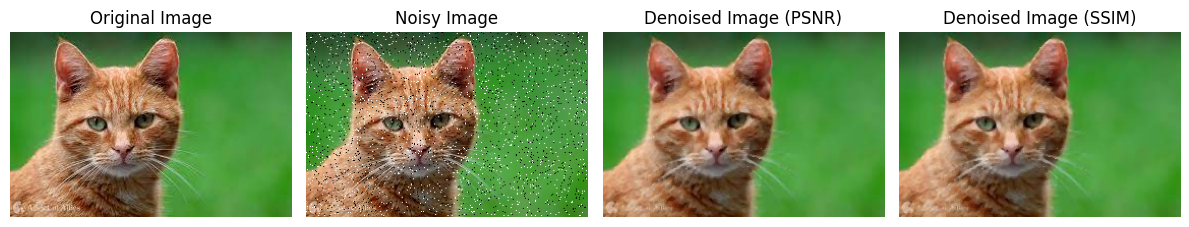

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# 원본 이미지 로드 또는 생성
original_image = cv2.imread("./img/cat.jpg", cv2.IMREAD_COLOR)

# 소금-후추 노이즈 생성 및 추가
noise_amount = 0.02  # 노이즈가 추가될 픽셀 비율
salt_amount = int(noise_amount * original_image.size) // 2  # 흰색 (소금) 노이즈 개수
pepper_amount = int(noise_amount * original_image.size) // 2  # 검은색 (후추) 노이즈 개수

salt_coords = [np.random.randint(0, i - 1, salt_amount) for i in original_image.shape]
pepper_coords = [np.random.randint(0, i - 1, pepper_amount) for i in original_image.shape]

noisy_image = original_image.copy()

for i in range(salt_amount):
    noisy_image[salt_coords[0][i], salt_coords[1][i], :] = 255  # 흰색

for i in range(pepper_amount):
    noisy_image[pepper_coords[0][i], pepper_coords[1][i], :] = 0  # 검은색

# 그리드 서치를 위한 파라미터 조합
kernel_sizes = [1, 3, 5, 7, 9, 11, 13]

best_psnr = -np.inf
best_ssim = -np.inf
best_params = {}

# 그리드 서치 실행
for kernel_size in kernel_sizes:
    denoised_image = cv2.medianBlur(noisy_image, kernel_size)
            
    # PSNR 계산
    psnr_noisy = cv2.PSNR(original_image, noisy_image)
    psnr_denoised = cv2.PSNR(original_image, denoised_image)
            
    # SSIM 계산
    ssim_noisy = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                      cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY))
    ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                         cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY))
            
    if psnr_denoised > best_psnr:
        best_psnr = psnr_denoised
        best_params['psnr'] = (kernel_size,)
        best_denoised_image_psnr = denoised_image
            
    if ssim_denoised > best_ssim:
        best_ssim = ssim_denoised
        best_params['ssim'] = (kernel_size,)
        best_denoised_image_ssim = denoised_image

psnr_denoised = cv2.PSNR(original_image, best_denoised_image_psnr)
ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                         cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2GRAY))

print(f"Best PSNR Parameters: Kernel Size = {best_params['psnr'][0]}")
print(f"Best SSIM Parameters: Kernel Size = {best_params['ssim'][0]}")
print(f"PSNR for Noisy Image: {psnr_noisy:.2f}")
print(f"PSNR for Denoised Image: {psnr_denoised:.2f}")
print(f"SSIM for Noisy Image: {ssim_noisy:.2f}")
print(f"SSIM for Denoised Image: {ssim_denoised:.2f}")

# 이미지 출력
plt.figure(figsize=(12, 6))

# 원본 이미지
plt.subplot(141)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# 노이즈가 섞인 이미지
plt.subplot(142)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (PSNR)
plt.subplot(143)
plt.imshow(cv2.cvtColor(best_denoised_image_psnr, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (PSNR)")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (SSIM)
plt.subplot(144)
plt.imshow(cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (SSIM)")
plt.axis("off")

plt.tight_layout()
plt.show()